In [12]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import math
import psycopg2
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas_ta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split


In [13]:
# load password
from config import db_password

# Assign connection values
url = "finalproject.crrfdeawjuaz.us-east-1.rds.amazonaws.com"
port = "5432"
db_name = "tesla"

In [14]:
# Connect to the AWS database
from sqlalchemy import create_engine
db_string = f"postgresql://postgres:{db_password}@{url}:{port}/{db_name}"
engine = create_engine(db_string)
conn = engine.connect()

Exception during reset or similar
Traceback (most recent call last):
  File "C:\Anaconda\envs\mlenv\lib\site-packages\sqlalchemy\pool\base.py", line 670, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Anaconda\envs\mlenv\lib\site-packages\sqlalchemy\pool\base.py", line 875, in _reset
    pool._dialect.do_rollback(self)
  File "C:\Anaconda\envs\mlenv\lib\site-packages\sqlalchemy\engine\default.py", line 642, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.



In [16]:
# read table daily values
df1 = pd.read_sql('SELECT * FROM "daily_values"', conn)
print(df1.shape)
df1.head()

(2821, 9)


,ticker,hdate,hopen,hhigh,hlow,hclose,hadjclose,hvolume,q_key
0,TSLA,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,None
1,TSLA,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010Q2
2,TSLA,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,None
3,TSLA,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,None
4,TSLA,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,None


In [17]:
# Reindex data using a DatetimeIndex
df2 = df1
df1_series = pd.to_datetime(df2['hdate'])
df1_index = pd.DatetimeIndex(df1_series.values)
df3 = df2.set_index(df1_index)
df3.drop('hdate', axis=1, inplace=True)
print(df3.shape)
df3

(2821, 8)


,ticker,hopen,hhigh,hlow,hclose,hadjclose,hvolume,q_key
2010-06-29,TSLA,3.800,5.000,3.508,4.778,4.778,93831500,None
2010-06-30,TSLA,5.158,6.084,4.660,4.766,4.766,85935500,2010Q2
2010-07-01,TSLA,5.000,5.184,4.054,4.392,4.392,41094000,None
2010-07-02,TSLA,4.600,4.620,3.742,3.840,3.840,25699000,None
2010-07-06,TSLA,4.000,4.000,3.166,3.222,3.222,34334500,None
...,...,...,...,...,...,...,...,...
2021-09-03,TSLA,732.250,734.000,724.200,733.570,733.570,15246100,None
2021-09-07,TSLA,740.000,760.200,739.260,752.920,752.920,20039800,None
2021-09-08,TSLA,761.580,764.450,740.770,753.870,753.870,18793000,None
2021-09-09,TSLA,753.410,762.100,751.630,754.860,754.860,14077700,None


In [18]:
# New Dataframe for just the close price column
df4 = df3[['hclose']]
print (df4.shape)
df4

(2821, 1)


,hclose
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222
...,...
2021-09-03,733.570
2021-09-07,752.920
2021-09-08,753.870
2021-09-09,754.860


In [19]:
# print info
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2010-06-29 to 2021-09-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hclose  2821 non-null   float64
dtypes: float64(1)
memory usage: 44.1 KB
None


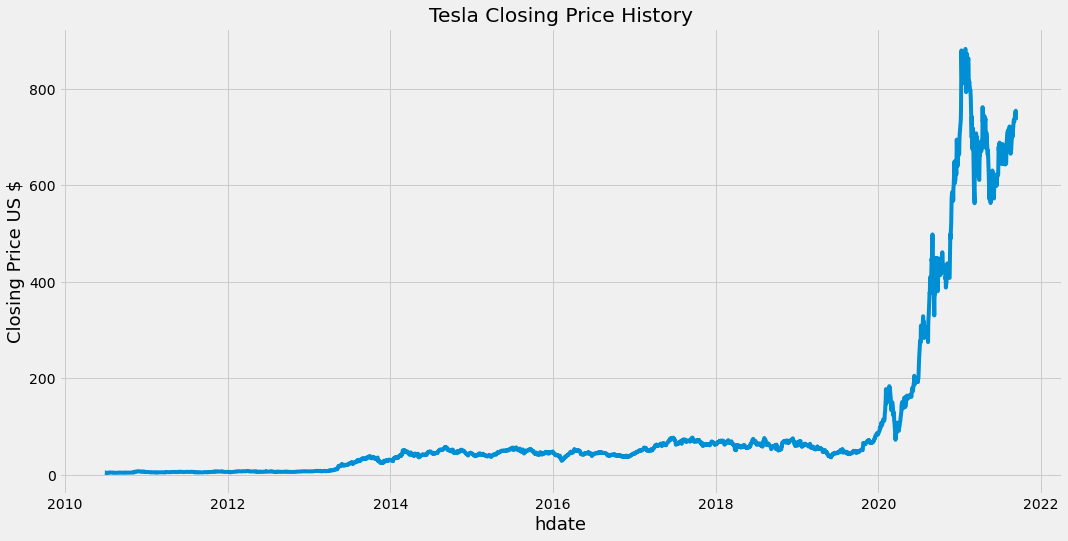

In [20]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Tesla Closing Price History')
plt.plot(df4['hclose'])
plt.xlabel('hdate', fontsize=18)
plt.ylabel('Closing Price US $', fontsize=18)
plt.show()

In [21]:
#Add technical indicators
df4.ta.ema(close='hclose', length=365, append=True)
print(df4.shape)
print(df4)

(2821, 2)
             hclose     EMA_365
2010-06-29    4.778         NaN
2010-06-30    4.766         NaN
2010-07-01    4.392         NaN
2010-07-02    3.840         NaN
2010-07-06    3.222         NaN
...             ...         ...
2021-09-03  733.570  527.302151
2021-09-07  752.920  528.535036
2021-09-08  753.870  529.766374
2021-09-09  754.860  530.996394
2021-09-10  736.270  532.118108

[2821 rows x 2 columns]


C:\Anaconda\envs\mlenv\lib\site-packages\pandas_ta\core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


In [22]:
# Drop the nans
df4.dropna(subset=["EMA_365"], inplace=True)
print(df4.shape)
print(df4)

(2457, 2)
             hclose     EMA_365
2011-12-06    6.974    5.093068
2011-12-07    6.838    5.102604
2011-12-08    6.178    5.108480
2011-12-09    6.208    5.114488
2011-12-12    6.082    5.119775
...             ...         ...
2021-09-03  733.570  527.302151
2021-09-07  752.920  528.535036
2021-09-08  753.870  529.766374
2021-09-09  754.860  530.996394
2021-09-10  736.270  532.118108

[2457 rows x 2 columns]


C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


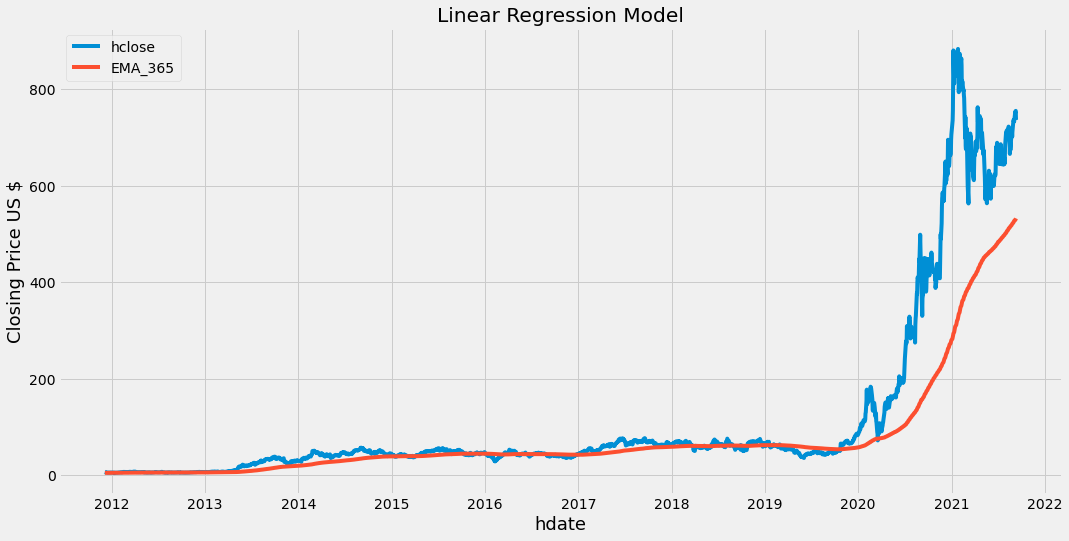

In [24]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')

plt.plot(df4[['hclose','EMA_365']])
plt.xlabel('hdate', fontsize=18)
plt.ylabel('Closing Price US $', fontsize=18)

plt.legend(['hclose', 'EMA_365'], loc='upper left')

plt.show()

In [12]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df4[['hclose']], df4[['EMA_365']], test_size=.2)

# Test set
print(X_test.describe())

           hclose
count  492.000000
mean   112.484602
std    183.579074
min      4.558000
25%     38.518000
50%     48.464000
75%     67.284500
max    854.690000


In [13]:
# Training set
print(X_train.describe())

            hclose
count  1965.000000
mean    114.706094
std     189.110157
min       5.220000
25%      38.436000
50%      49.230000
75%      67.738000
max     883.090000


In [14]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Prediction of values by the model
y_pred = model.predict(X_test)
print(y_pred.shape)
print (y_pred)

(492, 1)
[[ 46.6336873 ]
 [ 16.90833359]
 [ 46.83529187]
 [ 41.36285985]
 [ 41.97845455]
 [ 46.77276211]
 [ 44.51522219]
 [ 40.89280856]
 [ 46.27683643]
 [ 37.24128626]
 [120.53631575]
 [ 51.3546841 ]
 [ 46.0267174 ]
 [ 50.65284146]
 [ 38.62125335]
 [ 16.79836746]
 [ 40.69443829]
 [ 52.28184949]
 [ 16.91264598]
 [ 49.6739273 ]
 [ 37.55824745]
 [ 34.70128432]
 [ 19.08285986]
 [ 35.74704063]
 [ 33.94877101]
 [173.93026134]
 [ 16.91372408]
 [ 23.20335536]
 [ 45.12111399]
 [ 40.04218822]
 [121.24570508]
 [ 31.66751291]
 [ 55.72422054]
 [ 46.89997782]
 [ 44.54540897]
 [ 17.42366505]
 [ 16.52021784]
 [ 40.44431926]
 [ 47.89506347]
 [ 46.49245629]
 [ 42.88082366]
 [ 27.28827358]
 [424.26707342]
 [ 40.17587253]
 [ 16.61616868]
 [ 49.39685579]
 [ 37.05046268]
 [ 16.80483605]
 [ 16.80267985]
 [ 37.42456314]
 [ 50.00059139]
 [ 37.42995363]
 [ 16.31106658]
 [229.15589763]
 [ 24.48521542]
 [ 40.70737548]
 [ 46.45687901]
 [ 39.29506541]
 [ 28.29198402]
 [ 40.66856391]
 [ 48.80605737]
 [ 16.38653353]

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.53904965]]
Mean Absolute Error: 18.776335475161186
Coefficient of Determination: 0.9049630385366879


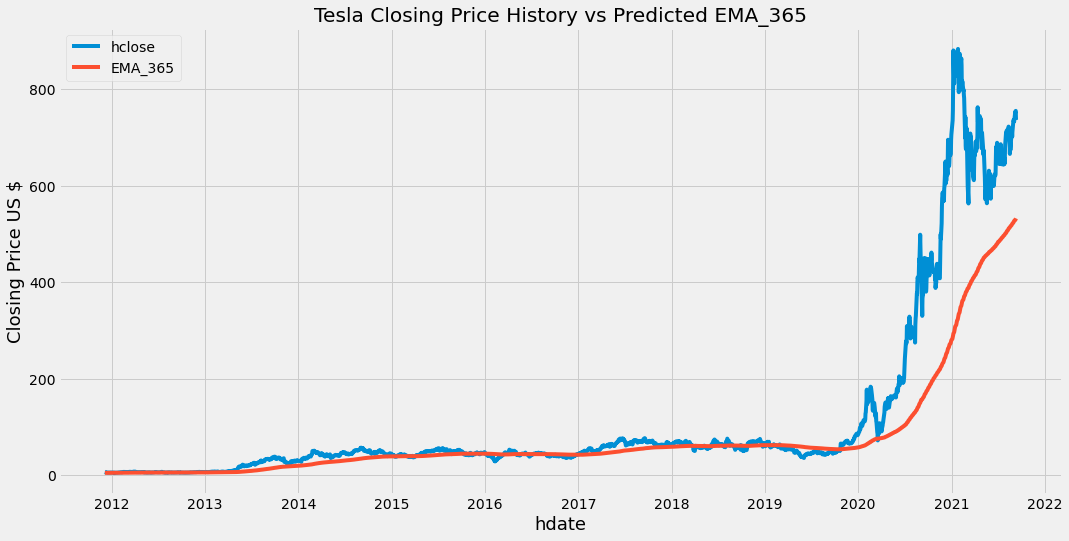

In [18]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Tesla Closing Price History vs Predicted EMA_365')

plt.plot(df4[['hclose','EMA_365']])
plt.xlabel('hdate', fontsize=18)
plt.ylabel('Closing Price US $', fontsize=18)

plt.legend(['hclose', 'EMA_365'], loc='upper left')
plt.show()